# Advertising Dataset Analysis and Ad Click Prediction

## **Data Loading and Preprocessing**


In [8]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "advertising_ef.csv"

df = pd.read_csv(file_path)

warnings.filterwarnings("ignore")

print("First 5 records:", df.head())
display(df.head())
print(df.shape)
df.info()

First 5 records:    Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     68.95  35.0     61833.90                256.09   
1                       NaN  31.0     68441.85                193.77   
2                     69.47  26.0     59785.94                236.50   
3                     74.15  29.0     54806.18                245.89   
4                     68.37  35.0     73889.99                225.58   

                           Ad Topic Line            City  Gender     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh  Female     Tunisia   
1     Monitored national standardization       West Jodi    Male       Nauru   
2       Organic bottom-line service-desk        Davidton  Female  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt    Male       Italy   
4          Robust logistical utilization    South Manuel  Female     Iceland   

          Timestamp  Clicked on Ad  
0  27-03-2016 00:53             

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


(1009, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


### Handle Missing Values

In [9]:
missing_values = df.isna().sum()

print("Number of missing values per column:", missing_values)

Number of missing values per column: Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64


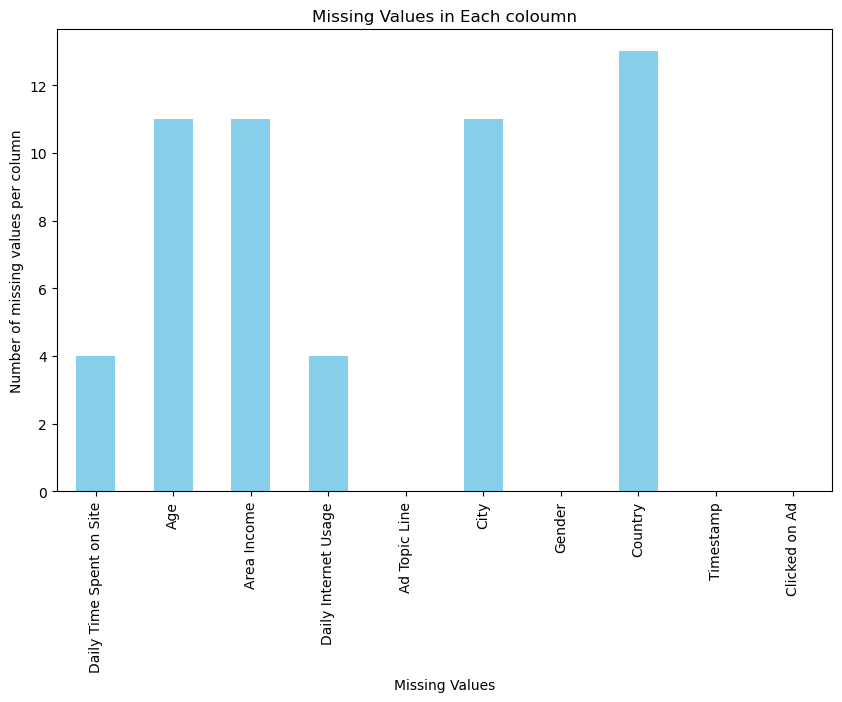

In [10]:
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each coloumn')
plt.ylabel('Number of missing values per column')
plt.xlabel('Missing Values')
plt.xticks(rotation=90)
plt.show()

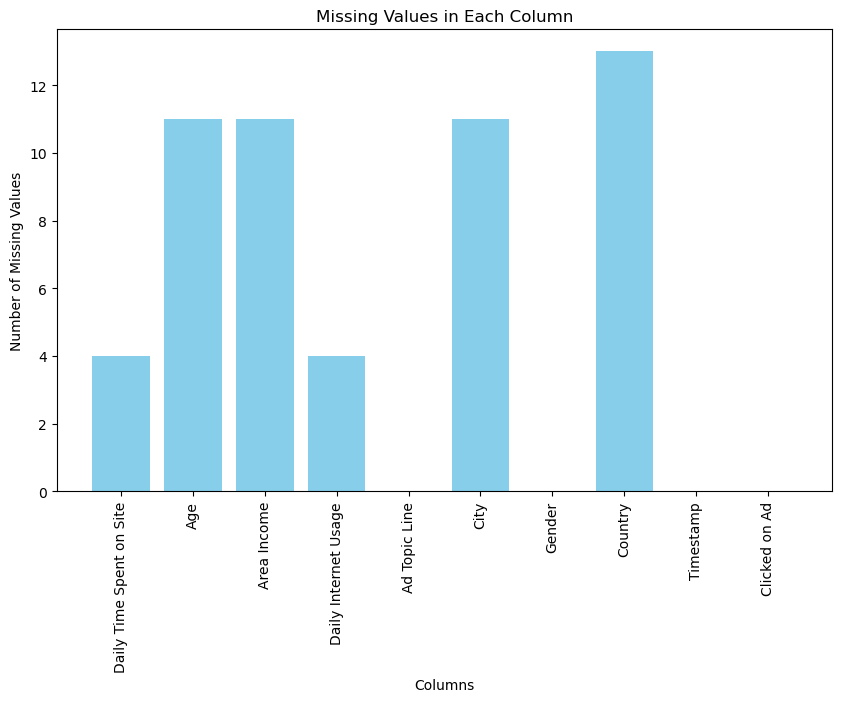

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_values.index, missing_values.values, color='skyblue')

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [15]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)
df['Area Income'].fillna(df['Area Income'].mean(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)

df['City'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)


missing_values = df.isna().sum()
print("Number of missing values per column:", missing_values)

Number of missing values per column: Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


In [ ]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Hour,Day,Month
0,68.950000,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27 00:53:00,0,0,27,3
1,65.009463,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04 01:39:00,0,1,4,4
2,69.470000,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13 20:35:00,0,20,13,3
3,74.150000,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10 02:31:00,0,2,10,1
4,68.370000,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03 03:36:00,0,3,3,6


## **Exploratory Data Visualization**

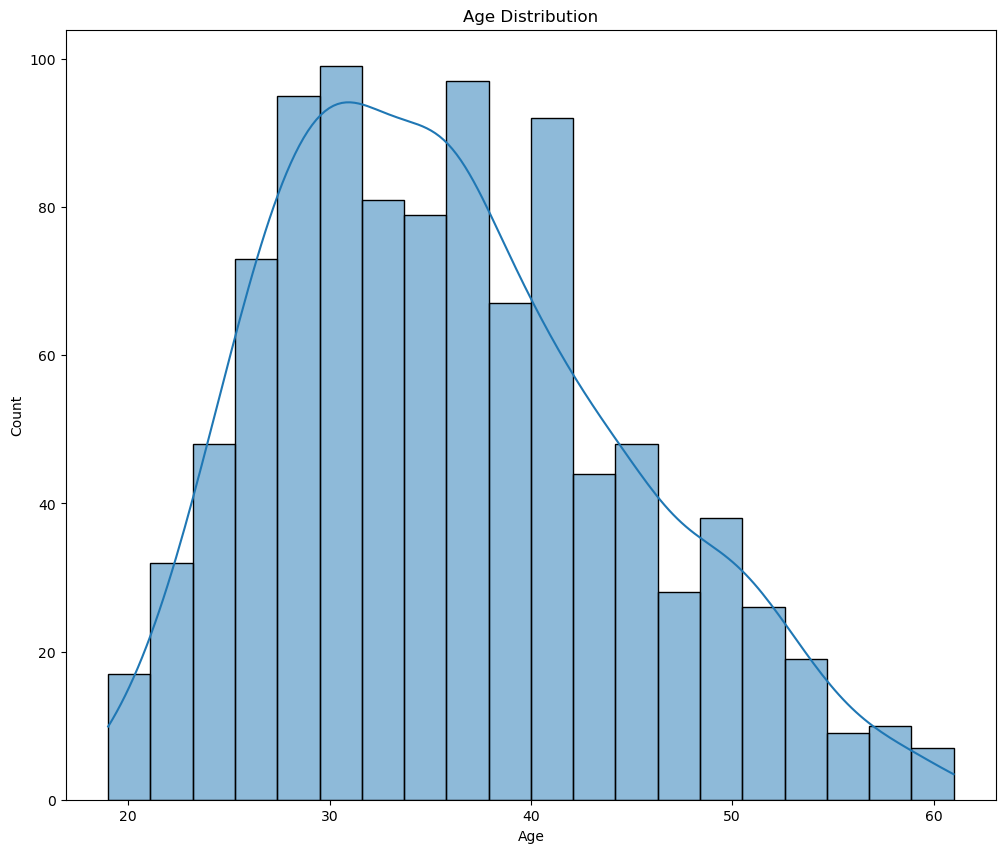

In [17]:
# Age Distribution Histogram
plt.figure(figsize=(12, 10))
sns.histplot(data=df, x="Age", bins=20, kde=True)

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Age vs. Clicked on Ad


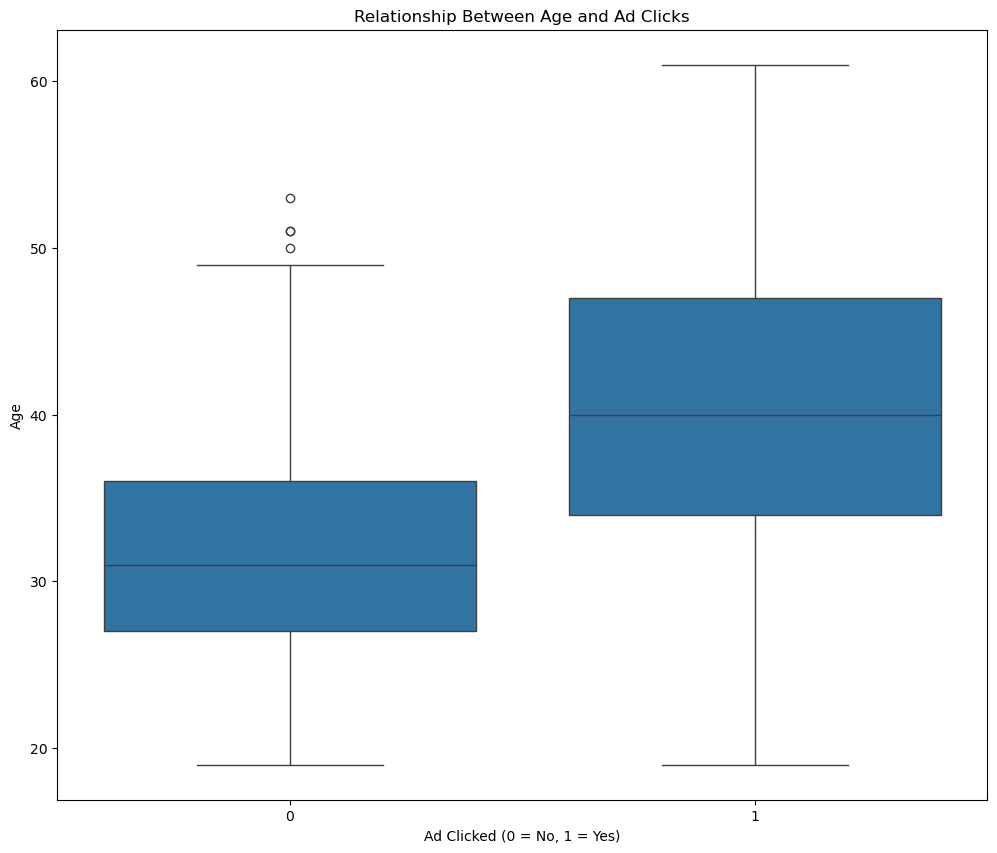

In [18]:
# Age vs. Clicked on Ad
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x="Clicked on Ad", y="Age")

plt.title("Relationship Between Age and Ad Clicks")
plt.xlabel("Ad Clicked (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


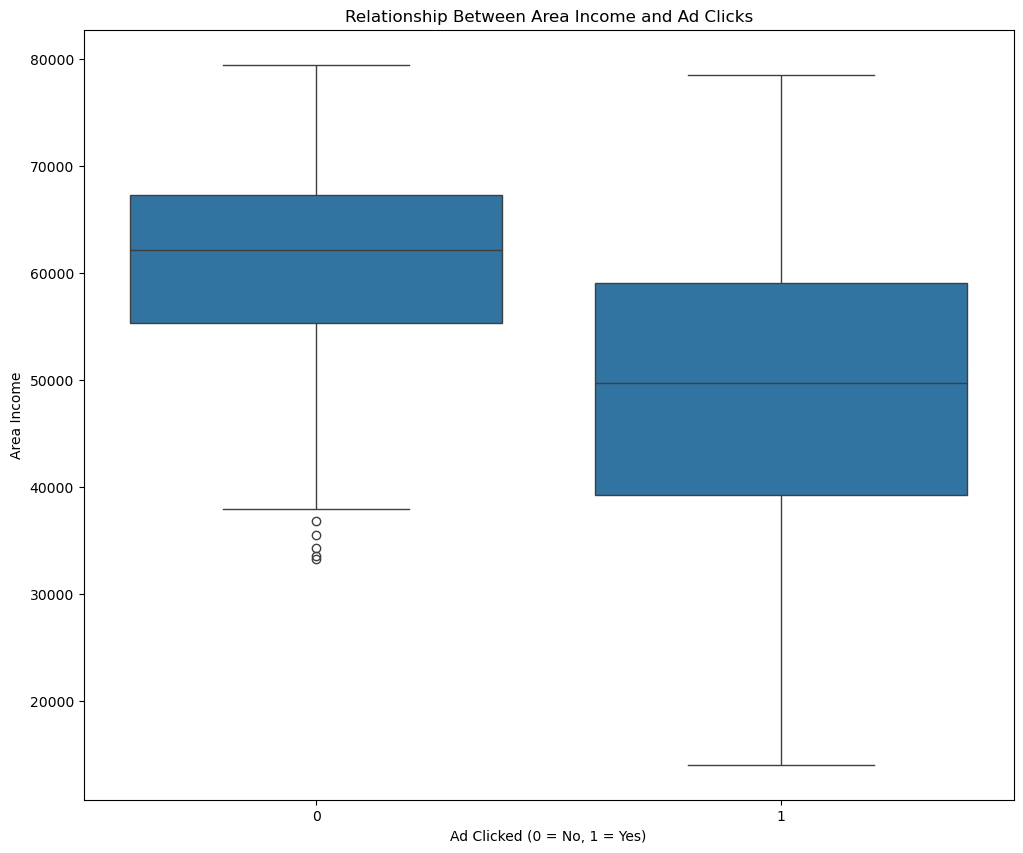

In [19]:
# Area Income vs. Clicked on Ad
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x="Clicked on Ad", y="Area Income")

plt.title("Relationship Between Area Income and Ad Clicks")
plt.xlabel("Ad Clicked (0 = No, 1 = Yes)")
plt.ylabel("Area Income")
plt.show()

Users with higher-incomes are less likely to click on ads, while those from lower to middle areas show more engagement, with a wider spread extending toward lower incomes. 

### Average Daily Time Spent on Site by Clicked on Ad


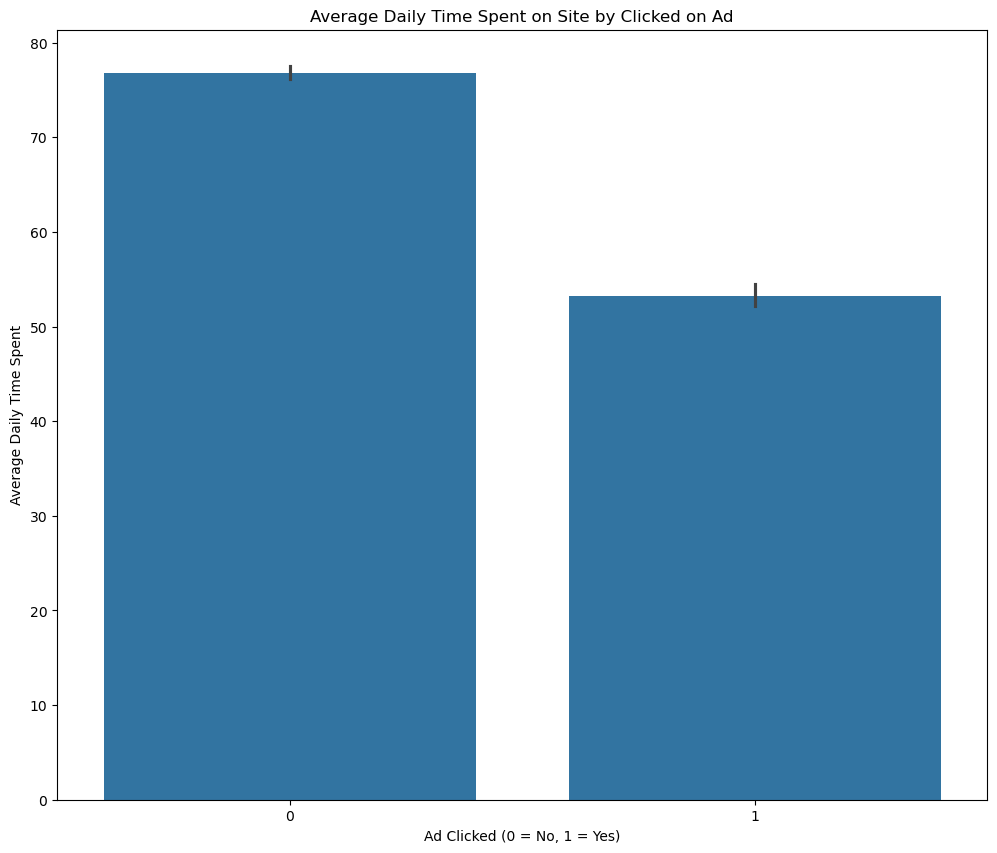

In [20]:
# Average Daily Time Spent on Site by Clicked on Ad
# This chart will show the average daily time spent on the site by whether an ad was clicked.

plt.figure(figsize=(12,10))
sns.barplot(data=df, x="Clicked on Ad", y="Daily Time Spent on Site")
plt.title("Average Daily Time Spent on Site by Clicked on Ad")
plt.xlabel("Ad Clicked (0 = No, 1 = Yes)")
plt.ylabel("Average Daily Time Spent")
plt.show()

Non clickers (0) spend about 77 minutes daily while ad clickers (1) spend less ~ around 53 minutes on average. Heavy site users may have developed ad fatigue and have learned to ignore ads. Shorter-duration users are more responsive when it comes to ad clicknig.

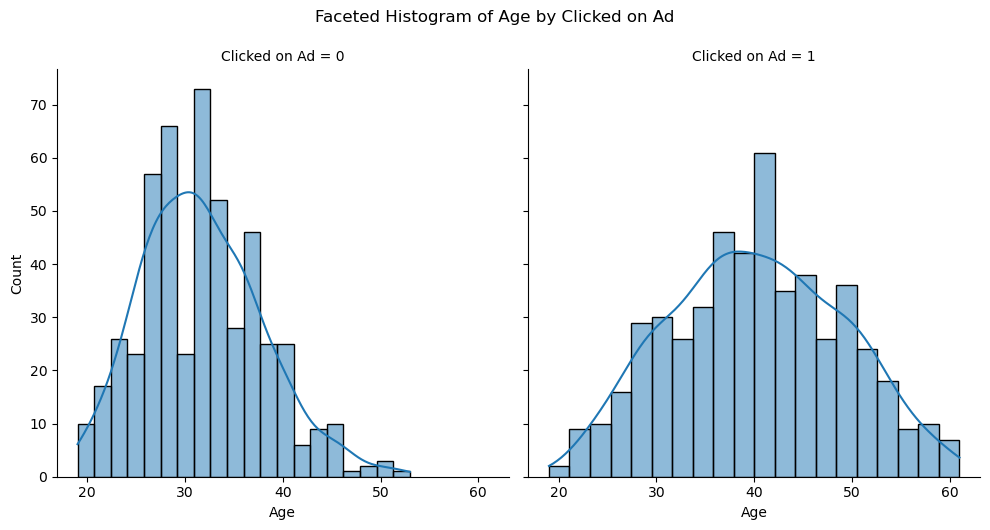

In [22]:
# Faceted Histogram of Age by Clicked on Ad

g = sns.FacetGrid(df, col="Clicked on Ad", height=5, aspect=1)
g.map(sns.histplot, "Age", bins=20, kde=True)
g.set_axis_labels("Age", "Count")
g.set_titles("Clicked on Ad = {col_name}")
g.fig.suptitle('Faceted Histogram of Age by Clicked on Ad', y=1.05)
plt.show()

This faceted histogram shows the distribution of age for users who clicked on an ad (right) versus those who did not (left), with a KDE curve overlay.


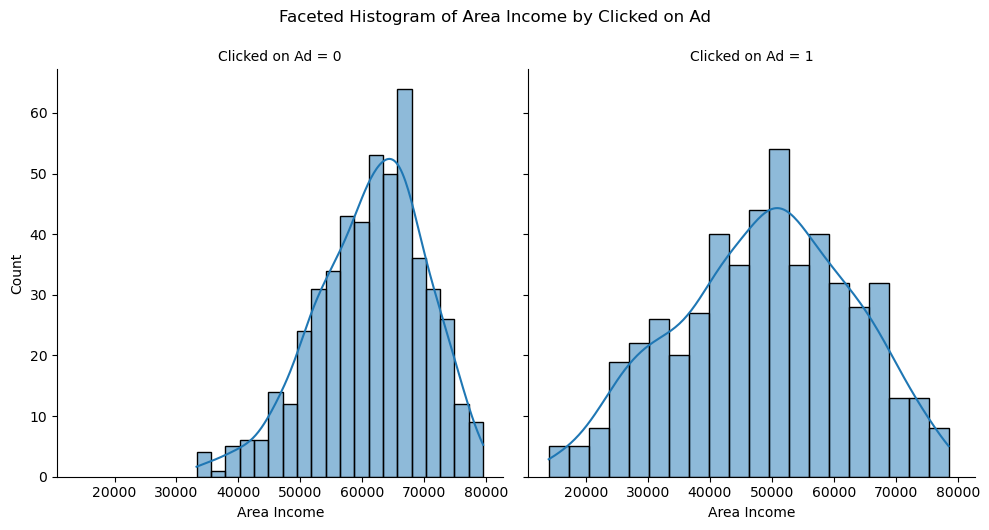

In [23]:
# Faceted Histogram of Age by Clicked on Ad
# Faceted histograms allow you to compare distributions across different subsets of data.

g = sns.FacetGrid(df, col="Clicked on Ad", height=5, aspect=1)
g.map(sns.histplot, "Area Income", bins=20, kde=True)
g.set_axis_labels("Area Income", "Count")
g.set_titles("Clicked on Ad = {col_name}")
g.fig.suptitle('Faceted Histogram of Area Income by Clicked on Ad', y=1.05)
plt.show()

The distribution peaks at 60-70k and is at lowest at around 45-55k. People from higher-income areas are less likely to click ads and vice versa. 

This algins with the boxplot confirming a negative relationship between income and ad-clicking behaviour. 

### Correlation Matrix

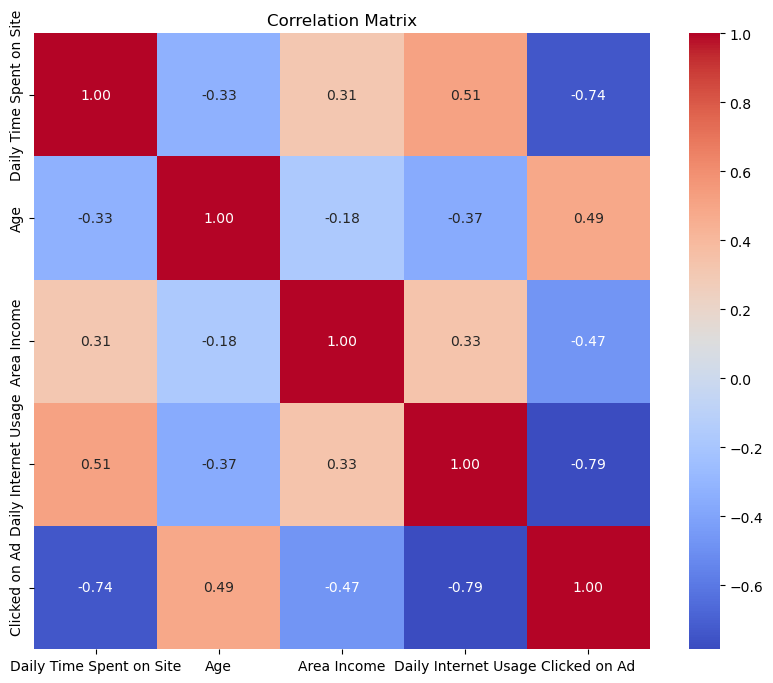

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(10, 8))
correlation_matrix = df[num_cols].corr()     

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)   
plt.title('Correlation Matrix')
plt.show()

# Strongest Correlations
1. Daily Internet Usage (Strong negative correlation): Heavier users are less likely to click
2. Daily time spent on site (Storng negative correlation): Users who spend longer on the site avoid ads.
3. Age (Moderate positive correlation): Older users tend to click on ads.
4. Area Income (Moderate negative correlation): Users from higher-income areas are less likely to click ads.

# Relationships:
1. Daily Time Spent on Site and Daily Internet Usage (Positive correlation)
2. Age vs Daily Internet Usage: Older users spend less time online
3. Area Income vs Daily Internet Usage: Higher incomes have a higher overall internet usage.

This suggests that ads should be tailored towards older, lower to middile income users who have a moderately low internet usage, as they are more responsive to ads. Moreover, users who have a high-usage, higher income, and are younger show more resistance to ads. 

## Predictive Modeling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
df2 = df.copy()
df2 = pd.get_dummies(df2, columns=['City', 'Country'], drop_first=True)
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour', 'Day', 'Month'] + [col for col in df.columns if col.startswith(('City_', 'Country_'))]

X = df2[features]
y = df2['Clicked on Ad']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train and Test

In [33]:
# Logistic Regression Model

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)

# Evaluating the model
print("Accuracy:")
print(accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy:
0.9653465346534653
Confusion Matrix:
[[ 93   3]
 [  4 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        96
           1       0.97      0.96      0.97       106

    accuracy                           0.97       202
   macro avg       0.97      0.97      0.97       202
weighted avg       0.97      0.97      0.97       202



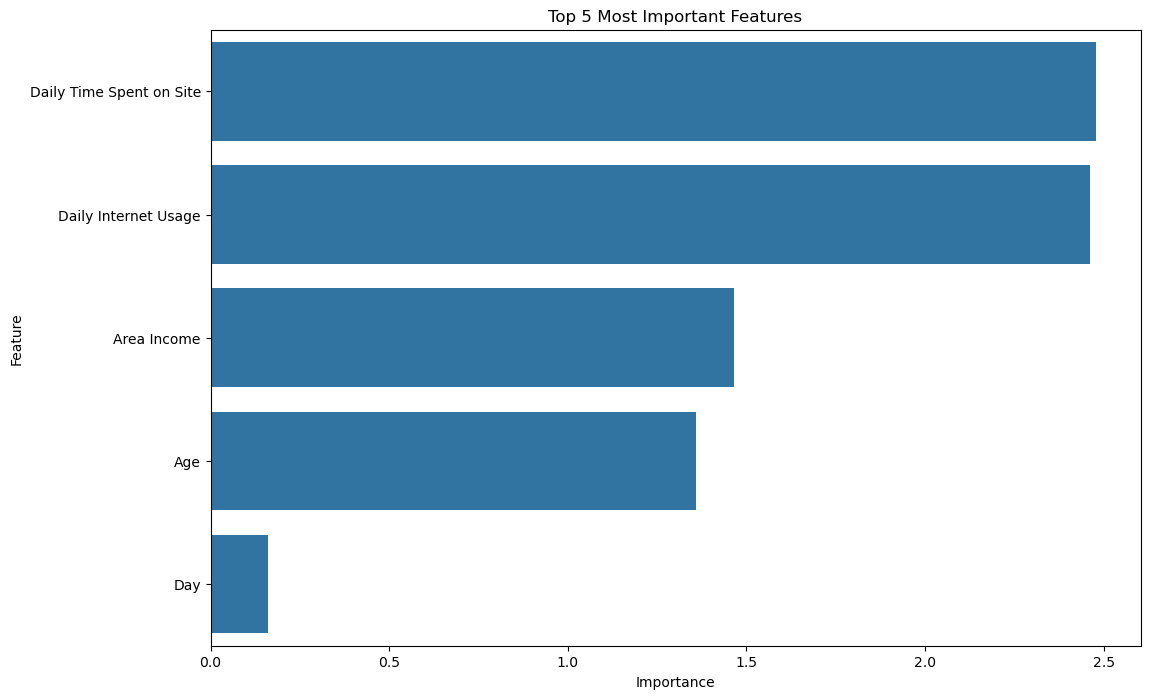

In [34]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': abs(lr_model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(5))
plt.title('Top 5 Most Important Features')
plt.show()